
### Vision Intelligence and Machine Learning
## Project No. 1


# Step 1: Import Libraries



In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

The code begins by importing the necessary libraries, including TensorFlow and Keras for deep learning, Matplotlib for plotting, and NumPy for numerical operations.

# Step 2: Define Object Classes

In [2]:
# Define the list of objects to detect
object_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

A list of object classes is defined for the image classification task. These classes represent different objects to be detected.

# Step 3: Load and Normalize CIFAR-10 Dataset

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 9s 0us/step


The code loads the CIFAR-10 dataset, which contains images and corresponding labels for the objects. It then normalizes the pixel values of the images to the range [0, 1].

# Step 4: Load Pre-trained VGG16 Model

In [4]:
# Load a pre-trained model (VGG16 in this case) with its weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 [==============================] - 0s 0us/step


It loads a pre-trained VGG16 model with weights pre-trained on the ImageNet dataset. This model is used as a base for transfer learning.

# Step 5: Add Custom Layers for Classification

In [5]:
# Add a global average pooling layer and an output layer for your object classes
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(object_classes), activation='softmax')(x)

The code adds custom layers to the VGG16 model for the final classification task. It includes a global average pooling layer and two dense layers for classification.

# Step 6: Create the Final Model

In [6]:
# Create a new model that combines the base model with your custom layers
model = Model(inputs=base_model.input, outputs=predictions)

It creates a new model by combining the base model (VGG16) with the custom layers for classification.

# Step 7: Compile the Model

In [7]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


The model is compiled with an Adam optimizer, sparse categorical cross-entropy loss, and accuracy as a metric.

# Step 8: Display Model Summary

In [8]:
# Display model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

The code displays a summary of the model architecture.

# Step 9: Implement Early Stopping

In [9]:
# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

It sets up early stopping to monitor the validation loss and restore the best model weights if the loss does not improve for a specified number of epochs.

# Step 10: Train the Model

In [10]:
# Train the model with the given data
history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/100
1563/1563 [==============================] - 64s 32ms/step - loss: 0.8384 - accuracy: 0.7131 - val_loss: 0.6223 - val_accuracy: 0.7928
Epoch 2/100
1563/1563 [==============================] - 49s 31ms/step - loss: 0.4968 - accuracy: 0.8325 - val_loss: 0.5761 - val_accuracy: 0.8126
Epoch 3/100
1563/1563 [==============================] - 48s 31ms/step - loss: 0.3532 - accuracy: 0.8809 - val_loss: 0.5230 - val_accuracy: 0.8284
Epoch 4/100
1563/1563 [==============================] - 51s 33ms/step - loss: 0.2509 - accuracy: 0.9149 - val_loss: 0.5144 - val_accuracy: 0.8390
Epoch 5/100
1563/1563 [==============================] - 48s 31ms/step - loss: 0.1787 - accuracy: 0.9410 - val_loss: 0.5819 - val_accuracy: 0.8325
Epoch 6/100
1563/1563 [==============================] - 48s 31ms/step - loss: 0.1328 - accuracy: 0.9545 - val_loss: 0.5081 - val_accuracy: 0.8567
Epoch 7/100
1563/1563 [==============================] - 48s 31ms/step - loss: 0.0989 - accuracy: 0.9672 - val_loss: 0

The model is trained on the CIFAR-10 dataset with the specified number of epochs and early stopping. The training history is stored in the 'history' variable.

# Step 11: Plot Training History

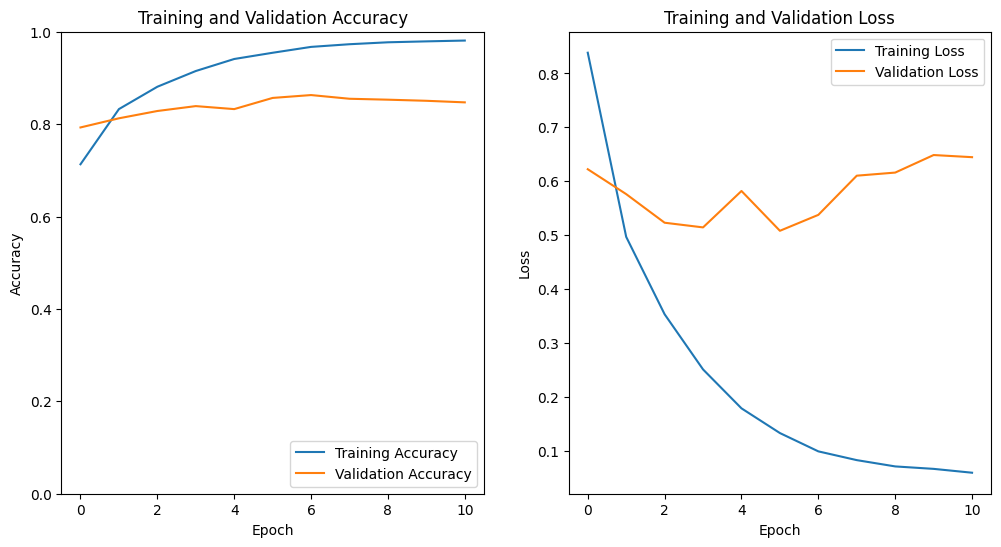

In [11]:
# Plot the model's training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


This step plots the training history, showing training and validation accuracy and loss across epochs.

# Step 12: Evaluate the Model on Test Data

In [12]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 3s - loss: 0.5081 - accuracy: 0.8567 - 3s/epoch - 8ms/step

Test accuracy: 0.8567000031471252


This code evaluates the trained model on the test data and prints the test accuracy.

# Step 13: Save the Trained Model

In [13]:
# Save the trained model
model.save('object_detection_model_with_transfer_learning.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The trained model is saved to a file named 'object_detection_model_with_transfer_learning.h5'.

In [14]:
# Load the trained model
model = load_model('/content/object_detection_model_with_transfer_learning.h5')

# Step 14: Define Function to Display Sample Predictions

In [15]:
import random

# Function to display sample images and their predictions
def display_sample_predictions(model, x_test, object_classes, num_samples=5):
    plt.figure(figsize=(12, 10))
    for i in range(num_samples):
        sample_index = random.randint(0, len(x_test) - 1)
        sample_image = x_test[sample_index]
        sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
        predictions = model.predict(sample_image)
        predicted_class = np.argmax(predictions)
        predicted_class_name = object_classes[predicted_class]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[sample_index])
        plt.title(f'Predicted: {predicted_class_name}')
        plt.axis('off')

    plt.show()




This step defines a function display_sample_predictions that takes the trained model, test data, object classes, and the number of samples to display. It randomly selects and displays sample images along with their predicted classes.

# Step 15: Display Multiple Sample Predictions

1/1 [==============================] - 0s 17ms/step


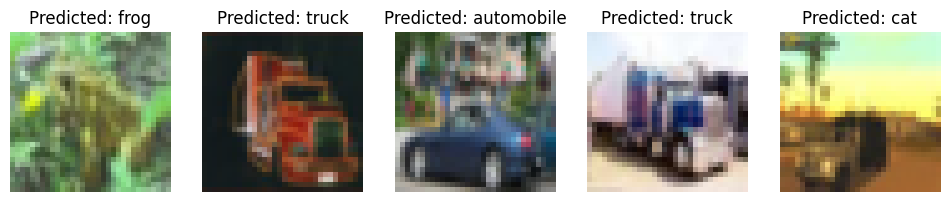

In [16]:
# Display multiple sample predictions
num_sample_images = 5  # Change this value to display more or fewer samples
display_sample_predictions(model, x_test, object_classes, num_samples=num_sample_images)

It uses the defined function to display multiple sample predictions based on the number specified in num_sample_images.

# Step 16: Load the Trained Model and Define Functions for Prediction

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('object_detection_model_with_transfer_learning.h5')

# List of object classes
object_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# List of file paths to the uploaded photos
uploaded_photos = ['/content/d1.jpg', '/content/c2.jpg','/content/s1.jpg']

# Function to preprocess an image
def preprocess_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.0  # Normalize to [0, 1]
    return image

# Function to make predictions and display the results
def predict_and_display_photos(model, object_classes, uploaded_photos):
    plt.figure(figsize=(12, 6))
    for i, photo_path in enumerate(uploaded_photos):
        image = preprocess_image(photo_path)
        predictions = model.predict(image)
        predicted_class = np.argmax(predictions)
        predicted_class_name = object_classes[predicted_class]

        plt.subplot(1, len(uploaded_photos), i + 1)
        img = plt.imread(photo_path)
        plt.imshow(img)
        plt.title(f'Predicted: {predicted_class_name}')
        plt.axis('off')
    plt.show()


In this step, the code loads the previously saved model, defines object classes, and specifies a list of file paths to uploaded photos.

# Step 17: Make Predictions and Display Results for Uploaded Photos

1/1 [==============================] - 0s 21ms/step


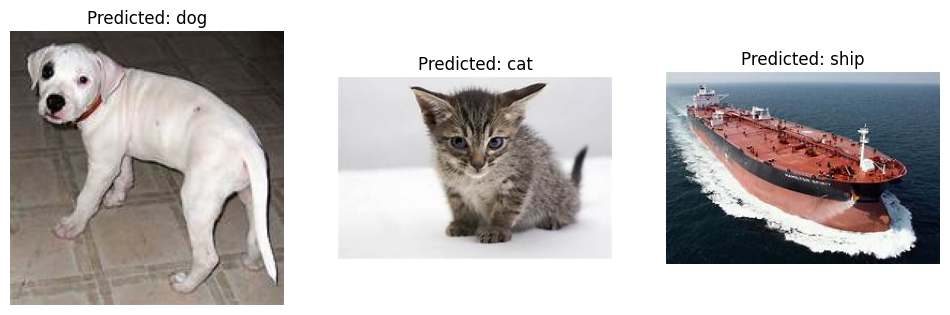

In [18]:
# Make predictions and display the results
predict_and_display_photos(model, object_classes, uploaded_photos)

It uses the defined functions to make predictions and display the results for the uploaded photos.